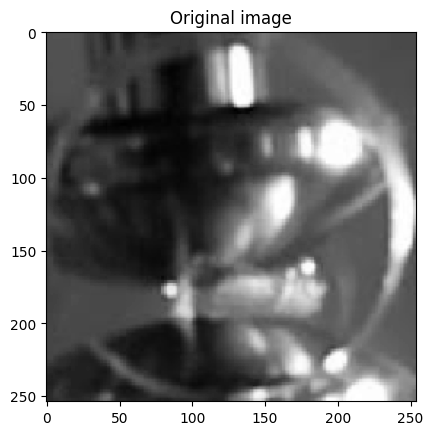

64516


In [14]:
import tensorflow as tf

import matplotlib.pyplot as plt

#Function to load an image using TensorFlow
def load_image(file_path):
    img = tf.keras.preprocessing.image.load_img(file_path, target_size=(254, 254))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.image.rgb_to_grayscale(img_array)  # Convertir a escala de grises si es necesario
    img_array = img_array / 255.0  # Normalizar los valores de píxeles entre 0 y 1
    return img_array


# Path of the image you want to upload

image_path = '/IMAGES/BREAK/29.65 s.png'
# Load image
image_array = load_image(image_path)

# Show original image
plt.imshow(image_array[:, :, 0], cmap='gray')
plt.title('Original image')
plt.show()

num_pixels = image_array.shape[0] * image_array.shape[1]
print(num_pixels)

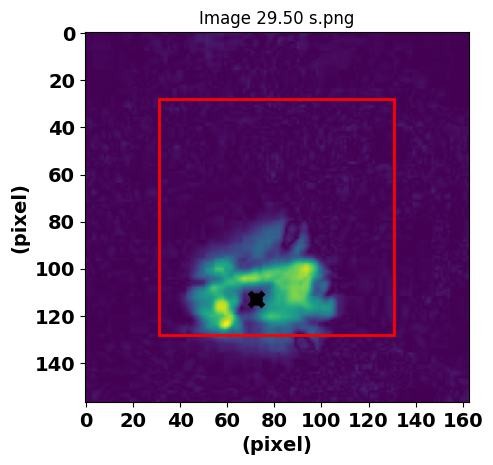

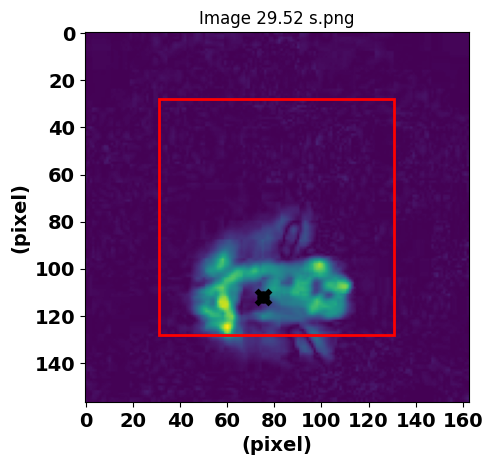

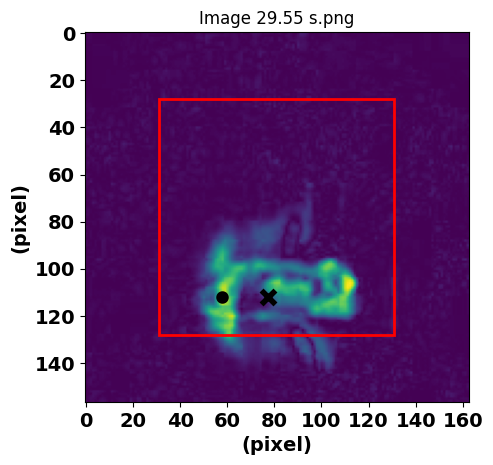

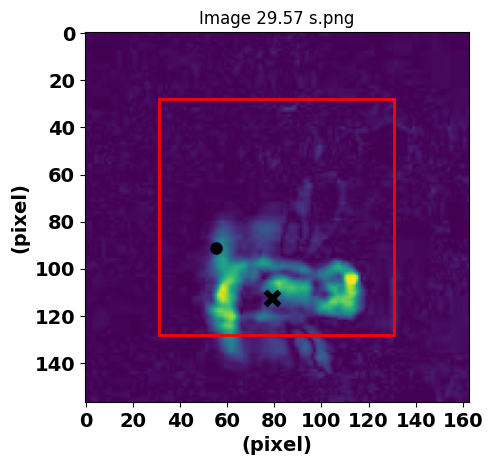

The results have been saved in /content/feature_ruptura.csv


In [18]:
import os
import random
import matplotlib.pyplot as plt
from skimage import measure, io, color
import numpy as np

# Image directory
image_directory = '/IMAGES/BREAK/'
classs = '1'

# List of image files in the directory
image_files = [f for f in os.listdir(image_directory) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Select the first image as the base image
base_image_path = os.path.join(image_directory, image_files[0])
base_image = io.imread(base_image_path)

# Remove the transparency channel (RGBA to RGB)
base_image_rgb = base_image[:,:,:3]

    # Convert the image to grayscale
base_image_gray = color.rgb2gray(base_image_rgb)

# Root directory to save the feature_ruptura.csv file
output_dir = '/FEATURE_RESULTS/'

# Full path of the feature_ruptura.txt.txt file
output_file_path = os.path.join(output_dir, 'feature_ruptura.csv')

# Write headers to the feature_DP.txt file
with open(output_file_path, 'w') as output_file:
    output_file.write("area_pixels, centroid_x, centroid_y, centroid_x_roi, centroid_y_roi, mean_coords_x, mean_coords_y, lado_px, image_width, image_height, mean_intensity, std_intensity, threshold, class\n")
modo=0
# Iterate over the remaining images and subtract them with the base image
for image_file in image_files[1:]:
    # Full path of the current image
    current_image_path = os.path.join(image_directory, image_file)
    # Load the current image
    current_image = io.imread(current_image_path)
    # Remove the transparency channel (RGBA to RGB)
    current_image_rgb = current_image[:,:,:3]

    # Convert the image to grayscale
    current_image_gray = color.rgb2gray(current_image_rgb)

    # Subtract the current image with the base image
    current_image_gray = np.abs(base_image_gray - current_image_gray)

    # Remove the transparency channel (RGBA to RGB)
    #current_image_rgb = current_image[:,:,:3]

    # Convert the image to grayscale
    #current_image_gray = color.rgb2gray(current_image_rgb)

    # Dimensions of the square centered on the image in pixels
    lado_px = 100

    # Calculate the coordinates of the centered square
    centro_x = current_image_rgb.shape[1] // 2
    centro_y = current_image_rgb.shape[0] // 2
    start_x = centro_x - lado_px // 2
    end_x = centro_x + lado_px // 2
    start_y = centro_y - lado_px // 2
    end_y = centro_y + lado_px // 2

    # Select the region of interest (ROI)
    roi = current_image_gray[start_y:end_y, start_x:end_x]

    # Calculate the mean and standard deviation of the pixels in the ROI
    mean_intensity = roi.mean()
    std_intensity = roi.std()

    # Threshold as the mean plus two times the standard deviation
    threshold = mean_intensity + 2 * std_intensity

    # Select pixels in the ROI that exceed the threshold
    above_threshold_mask = roi >= threshold

    # Get the coordinates (indices) of the pixels that exceed the threshold
    coords_x, coords_y = np.nonzero(above_threshold_mask)

    # Calculate the mean of the x and y coordinates
    mean_coords_x = np.mean(coords_x)
    mean_coords_y = np.mean(coords_y)

    # absolute values
    absolute_mean_coords_x = start_x + mean_coords_x
    absolute_mean_coords_y = start_y + mean_coords_y

    # Highlight the pixels that exceed the threshold in the original image
    image_highlighted = current_image_rgb.copy()

    image_highlighted[start_y:end_y, start_x:end_x][above_threshold_mask] = [255, 0, 0]  # Highlight in red

    # Calculate the area and centroid of the highlighted region
    labels = measure.label(above_threshold_mask)
    props = measure.regionprops(labels)

    # Get the area in pixels and the centroid
    area_pixels = props[0].area
    centroid_x, centroid_y = props[0].centroid

    # Adjust the centroid coordinates with respect to the ROI, these are absolute values
    # with respect to the upper left corner, which is 0,0
    centroid_x_roi = centroid_x + start_x
    centroid_y_roi = centroid_y + start_y
    modo=modo+1
    if modo < 5:
    # Display the modified image
     plt.figure()
     #plt.imshow(image_highlighted)
     plt.imshow(current_image_gray)
     plt.scatter(centroid_y_roi, centroid_x_roi, marker='.', color='black', s=100,linewidth=4)
     plt.scatter(mean_coords_y + start_y, mean_coords_x + start_x, marker='x', color='black', s=100,linewidth=4)
     plt.gca().add_patch(plt.Rectangle((start_x, start_y), lado_px, lado_px, linewidth=2, edgecolor='r', facecolor='none'))
     plt.title(f'Image {image_file}')  # Title with the name of the current image
     # Add 'pixel' on the axes
     plt.xlabel('(pixel)', fontsize=14, fontweight='bold')
     plt.ylabel('(pixel)', fontsize=14, fontweight='bold')
     # Increase the size of the numbers on the axes and make them bold
     plt.xticks(fontsize=14, fontweight='bold')
     plt.yticks(fontsize=14, fontweight='bold')
     plt.show()
# Write results to the feature_DP.csv file
    with open(output_file_path, 'a') as output_file:
        formatted_results = (
            f"{area_pixels:.3f}, {centroid_x:.3f}, {centroid_y:.3f}, "
            f"{centroid_x_roi:.3f}, {centroid_y_roi:.3f}, {mean_coords_x:.3f}, {mean_coords_y:.3f}, "
            f"{lado_px}, {current_image_gray.shape[1]}, {current_image_gray.shape[0]},{mean_intensity:.3f},{std_intensity:.3f},{threshold:.3f},{classs}\n"
        )

        output_file.write(formatted_results)

print(f"The results have been saved in {output_file_path}")

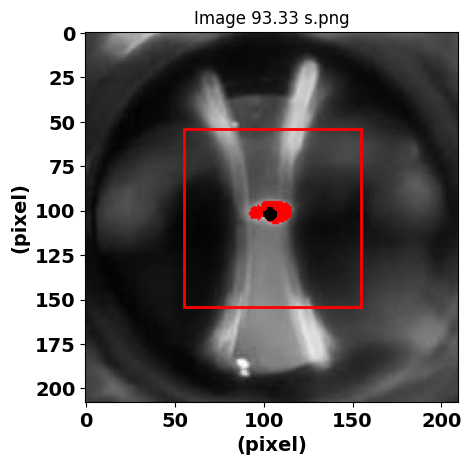

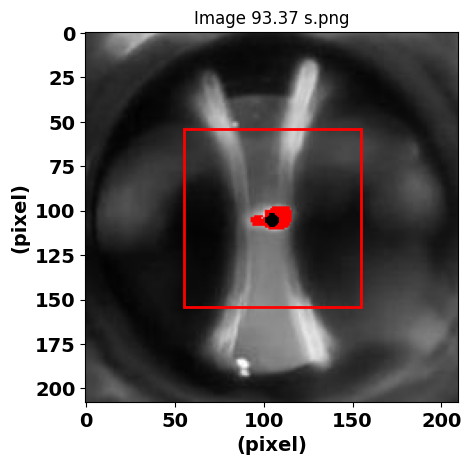

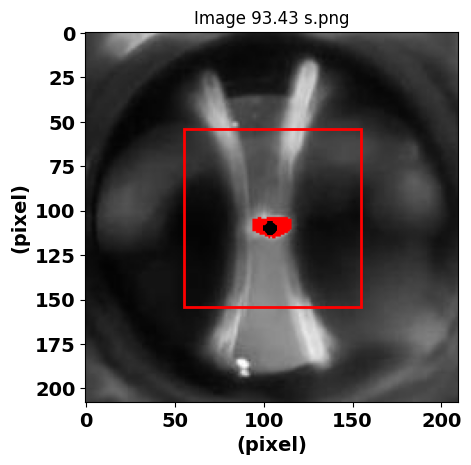

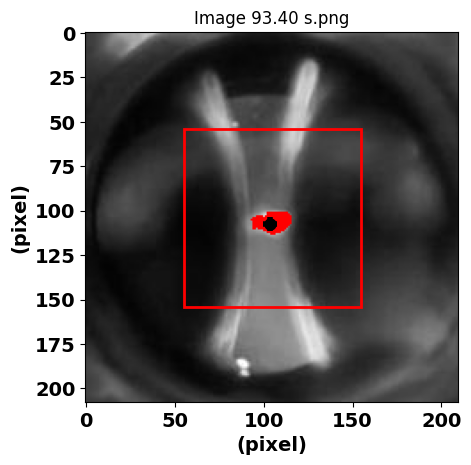

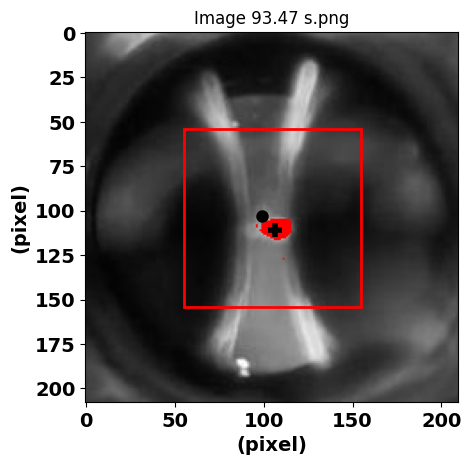

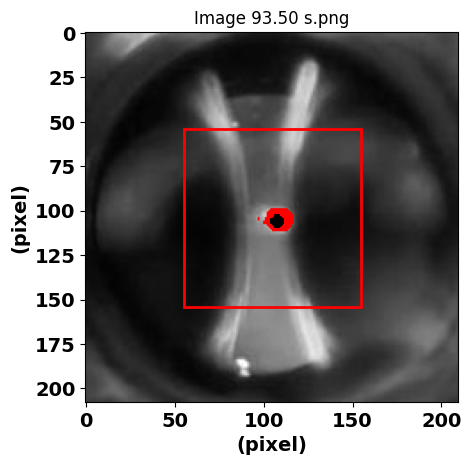

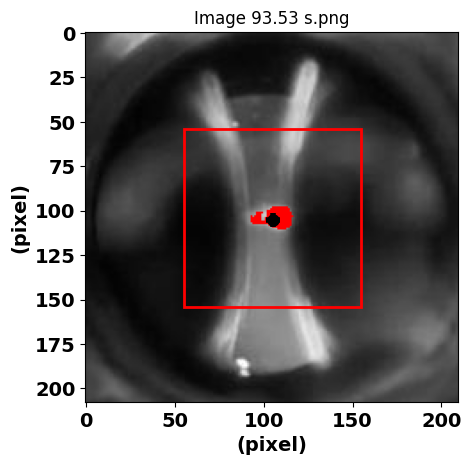

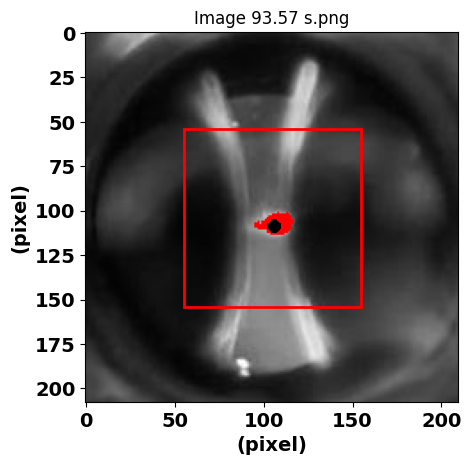

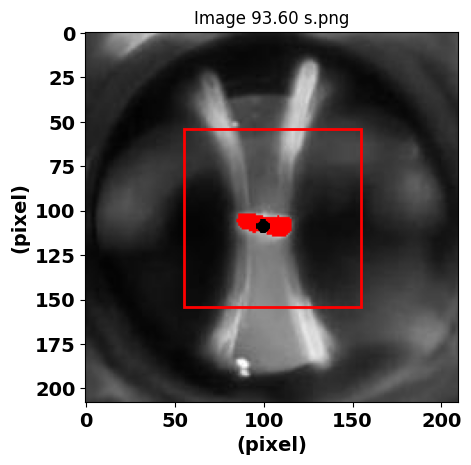

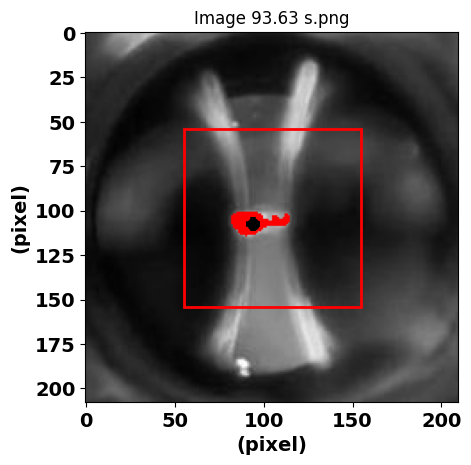

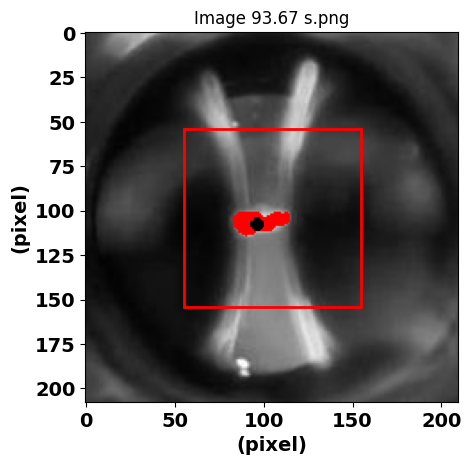

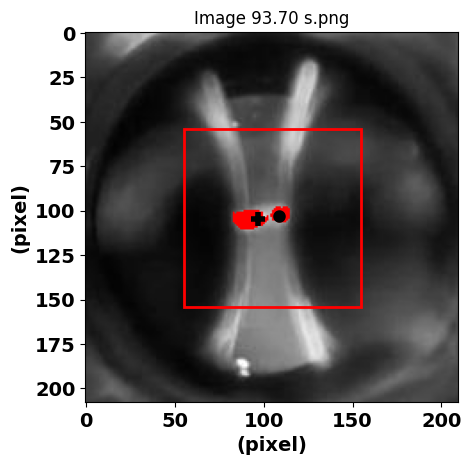

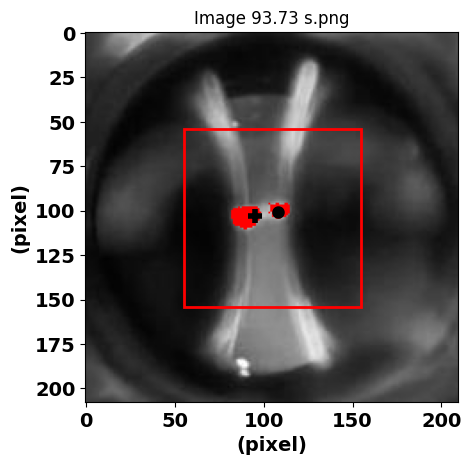

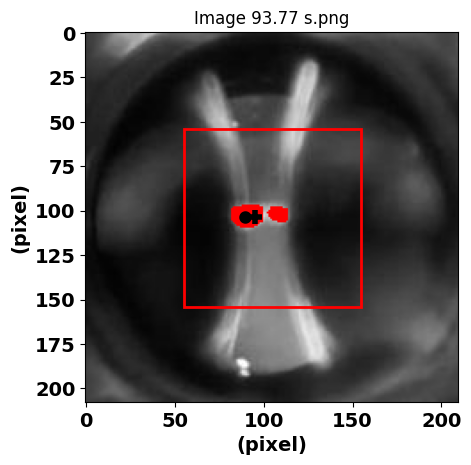

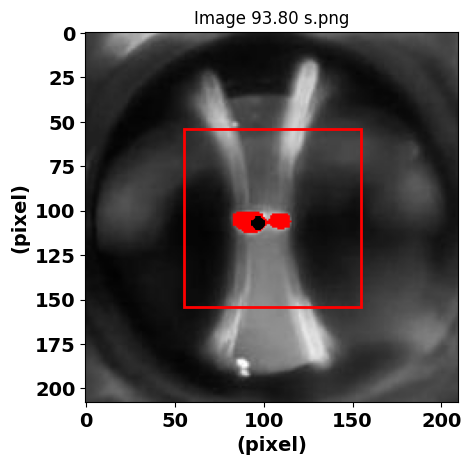

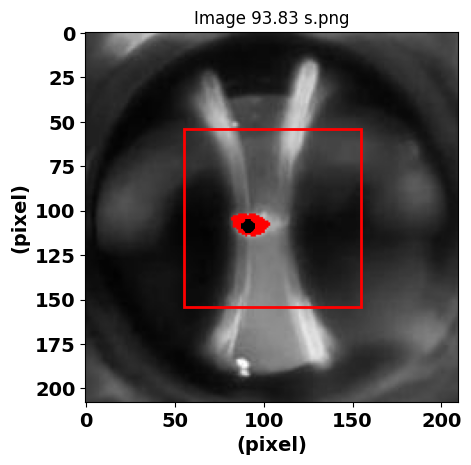

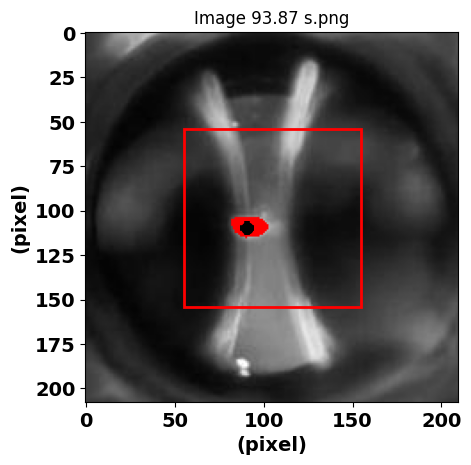

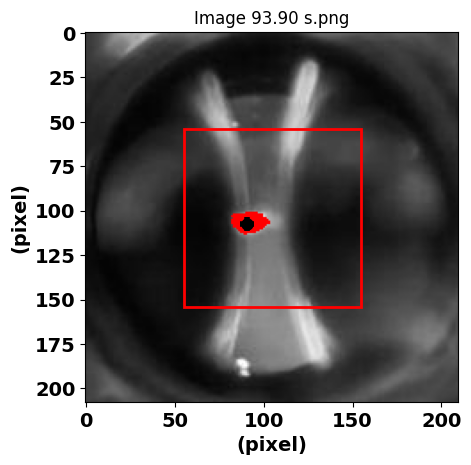

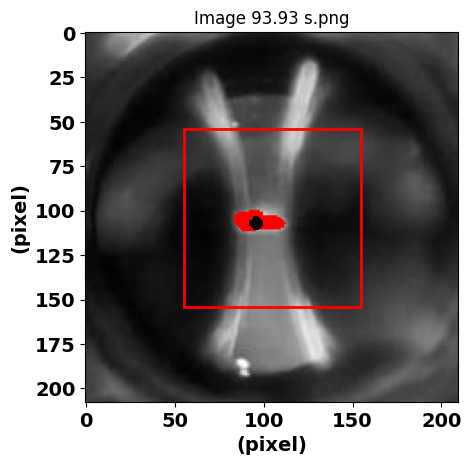

The results have been saved in /content/feature_DP.csv


In [20]:
import os
import random
import matplotlib.pyplot as plt
from skimage import measure, io, color
import numpy as np

# Image directory
image_directory = '/IMAGES/PD/'
classs = '0'

# List of image files in the directory
image_files = [f for f in os.listdir(image_directory) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Select the first image as the base image
base_image_path = os.path.join(image_directory, image_files[0])
base_image = io.imread(base_image_path)

# Remove the transparency channel (RGBA to RGB)
base_image_rgb = base_image[:,:,:3]

    # Convert the image to grayscale
base_image_gray = color.rgb2gray(base_image_rgb)

# Root directory to save the feature_DP.txt.txt file
output_dir = '/FEATURE_RESULTS/'

# Full path of the feature_ruptura.txt.txt file
output_file_path = os.path.join(output_dir, 'feature_DP.csv')

# Write headers to the feature_DP.txt file
with open(output_file_path, 'w') as output_file:
    output_file.write("area_pixels, centroid_x, centroid_y, centroid_x_roi, centroid_y_roi, mean_coords_x, mean_coords_y, lado_px, image_width, image_height, mean_intensity, std_intensity, threshold, class\n")
modo=0
# Iterate over the remaining images and subtract them with the base image
for image_file in image_files[1:]:
    # Full path of the current image
    current_image_path = os.path.join(image_directory, image_file)
    # Load the current image
    current_image = io.imread(current_image_path)
    # Remove the transparency channel (RGBA to RGB)
    current_image_rgb = current_image[:,:,:3]

    # Convert the image to grayscale
    current_image_gray = color.rgb2gray(current_image_rgb)

    # Subtract the current image with the base image
    current_image_gray = np.abs(base_image_gray - current_image_gray)

    # Remove the transparency channel (RGBA to RGB)
    #current_image_rgb = current_image[:,:,:3]

    # Convert the image to grayscale
    #current_image_gray = color.rgb2gray(current_image_rgb)

    # Dimensions of the square centered on the image in pixels
    lado_px = 100

    # Calculate the coordinates of the centered square
    centro_x = current_image_rgb.shape[1] // 2
    centro_y = current_image_rgb.shape[0] // 2
    start_x = centro_x - lado_px // 2
    end_x = centro_x + lado_px // 2
    start_y = centro_y - lado_px // 2
    end_y = centro_y + lado_px // 2

    # Select the region of interest (ROI)
    roi = current_image_gray[start_y:end_y, start_x:end_x]

    # Calculate the mean and standard deviation of the pixels in the ROI
    mean_intensity = roi.mean()
    std_intensity = roi.std()

    # Threshold as the mean plus two times the standard deviation
    threshold = mean_intensity + 2 * std_intensity

    # Select pixels in the ROI that exceed the threshold
    above_threshold_mask = roi >= threshold

    # Get the coordinates (indices) of the pixels that exceed the threshold
    coords_x, coords_y = np.nonzero(above_threshold_mask)

    # Calculate the mean of the x and y coordinates
    mean_coords_x = np.mean(coords_x)
    mean_coords_y = np.mean(coords_y)

    # Highlight the pixels that exceed the threshold in the original image
    image_highlighted = current_image_rgb.copy()
    image_highlighted[start_y:end_y, start_x:end_x][above_threshold_mask] = [255, 0, 0]  # Highlight in red

    # Calculate the area and centroid of the highlighted region
    labels = measure.label(above_threshold_mask)
    props = measure.regionprops(labels)

    # Get the area in pixels and the centroid
    area_pixels = props[0].area
    centroid_x, centroid_y = props[0].centroid

    # Adjust the centroid coordinates with respect to the ROI
    mean_x_roi = mean_coords_x + start_x
    mean_y_roi = mean_coords_y + start_y

    centroid_x_roi = centroid_x + start_x
    centroid_y_roi = centroid_y + start_y
    modo=modo+1
    if modo < 20:

    #

     # Display the modified image
      plt.figure()
      plt.imshow(image_highlighted)
      #plt.imshow(current_image_gray)
      plt.scatter(centroid_y_roi, centroid_x_roi, marker='.', color='black', s=100,linewidth=4)
      #plt.scatter(mean_coords_y + start_x, mean_coords_x + start_y, marker='x', color='black', s=100,linewidth=4)
      plt.scatter(mean_coords_y+start_y , mean_coords_x+start_x , marker='+', color='black', s=100,linewidth=4)
      plt.gca().add_patch(plt.Rectangle((start_x, start_y), lado_px, lado_px, linewidth=2, edgecolor='r', facecolor='none'))
      plt.title(f'Image {image_file}')  # Title with the name of the current image
     # Add 'pixel' on the axes
      plt.xlabel('(pixel)', fontsize=14, fontweight='bold')
      plt.ylabel('(pixel)', fontsize=14, fontweight='bold')
      # Increase the size of the numbers on the axes and make them bold
      plt.xticks(fontsize=14, fontweight='bold')
      plt.yticks(fontsize=14, fontweight='bold')
      plt.show()






# Write results to the feature_DP.csv file
    with open(output_file_path, 'a') as output_file:
        formatted_results = (
            f"{area_pixels:.3f}, {centroid_x:.3f}, {centroid_y:.3f}, "
            f"{centroid_x_roi:.3f}, {centroid_y_roi:.3f}, {mean_coords_x:.3f}, {mean_coords_y:.3f}, "
            f"{lado_px}, {current_image_gray.shape[1]}, {current_image_gray.shape[0]},{mean_intensity:.3f},{std_intensity:.3f},{threshold:.3f},{classs}\n"
        )

        output_file.write(formatted_results)

print(f"The results have been saved in {output_file_path}")

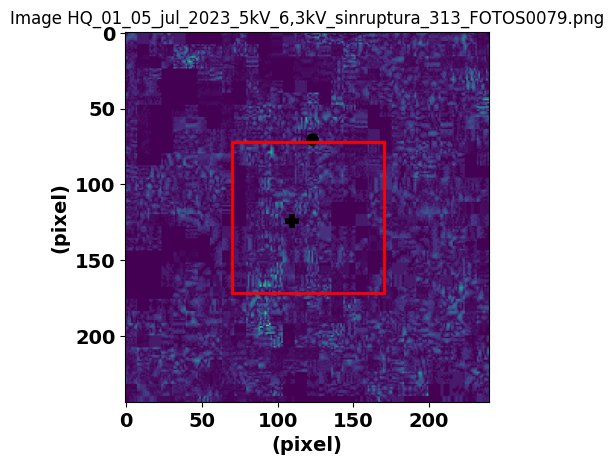

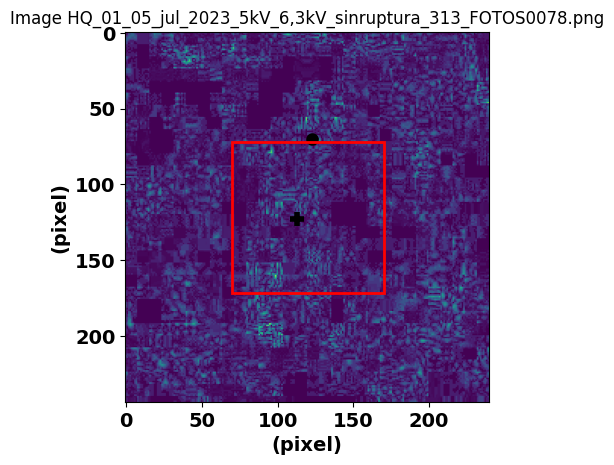

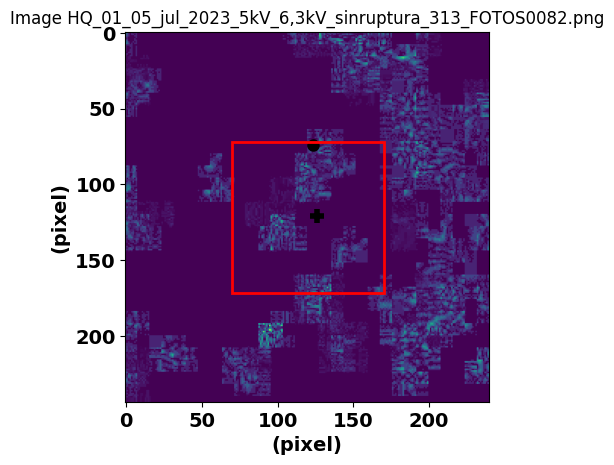

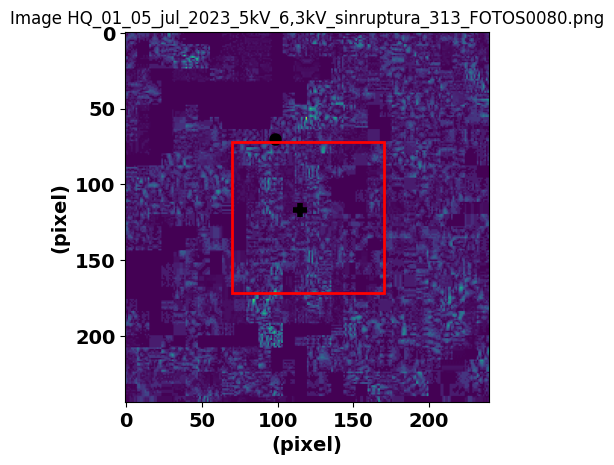

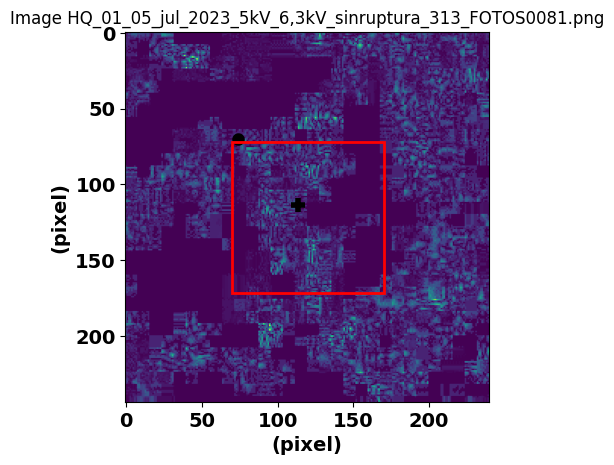

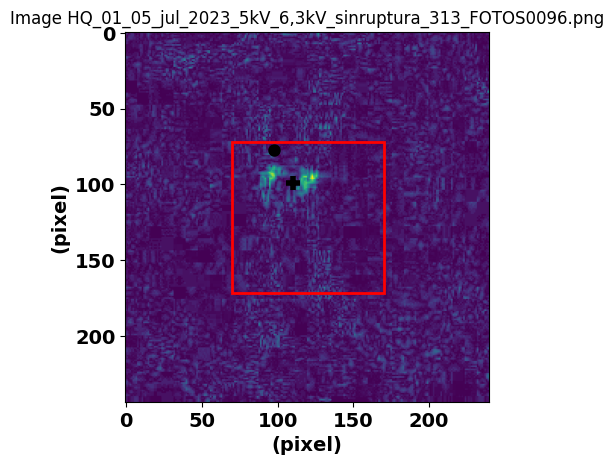

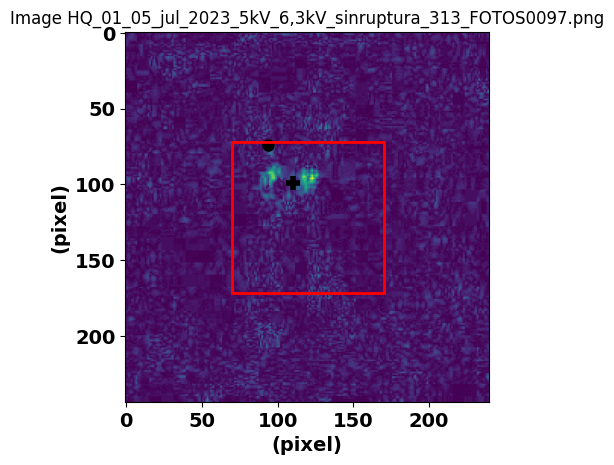

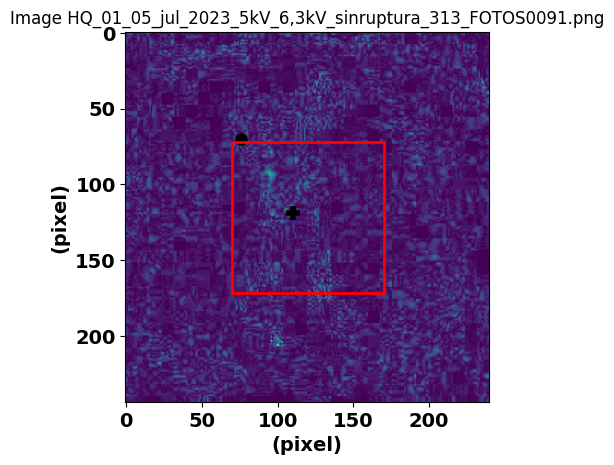

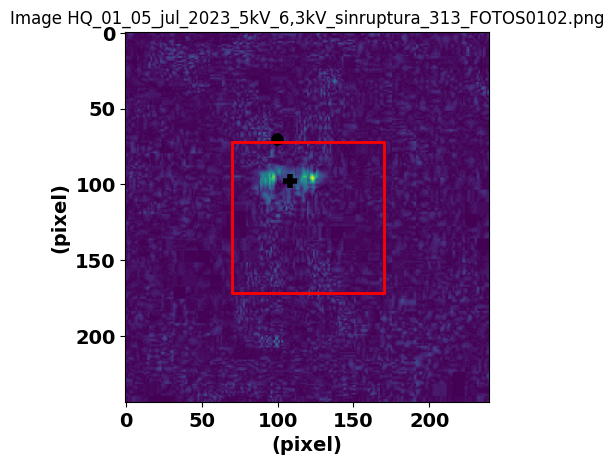

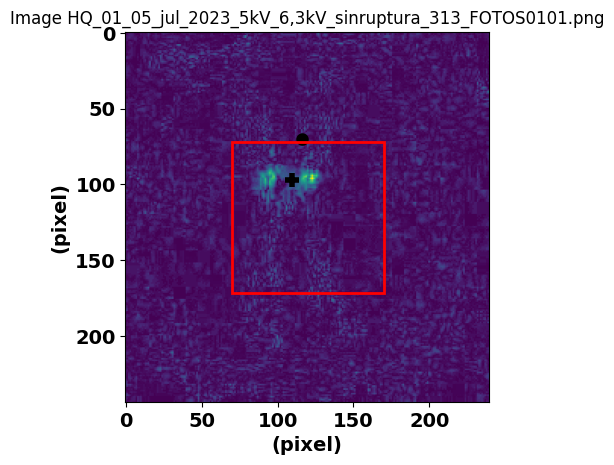

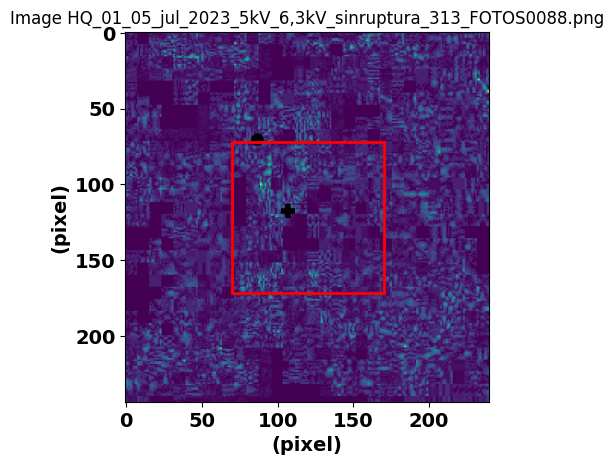

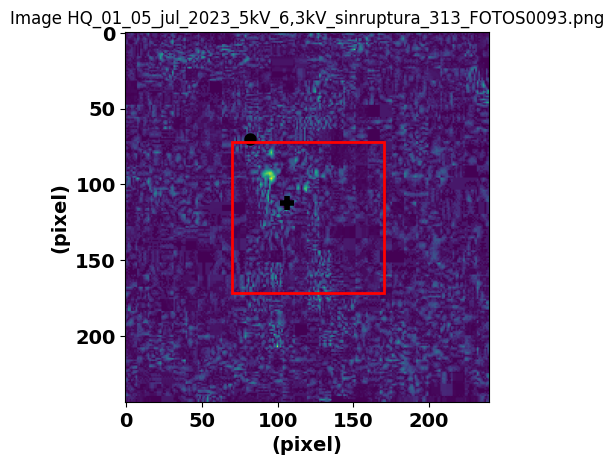

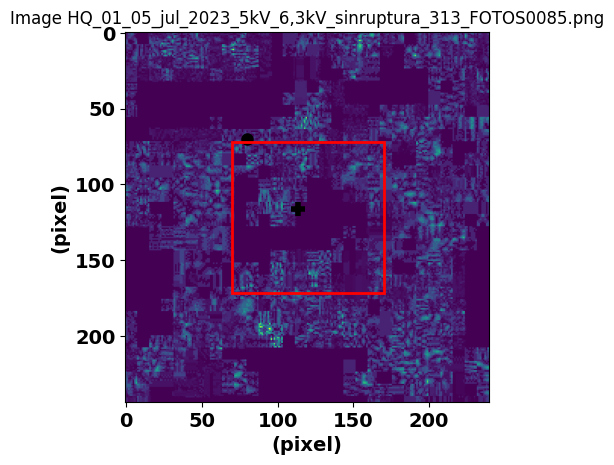

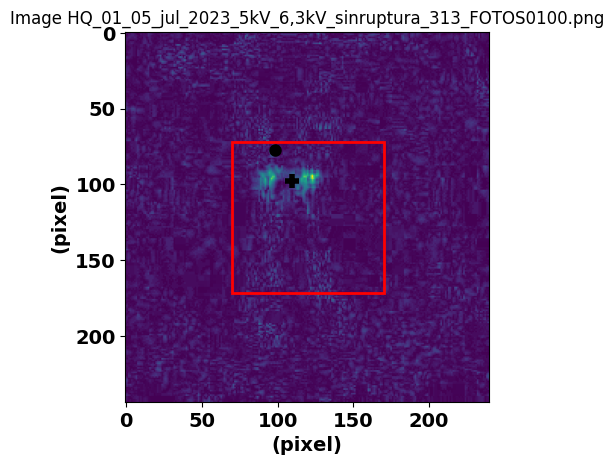

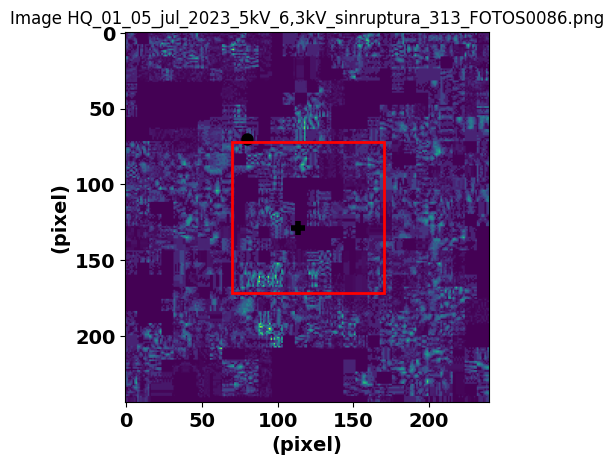

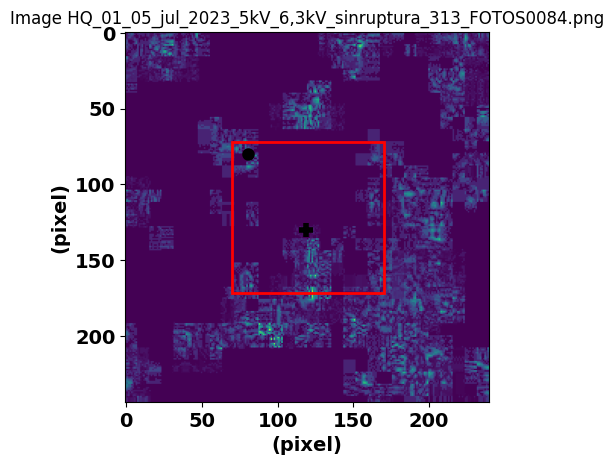

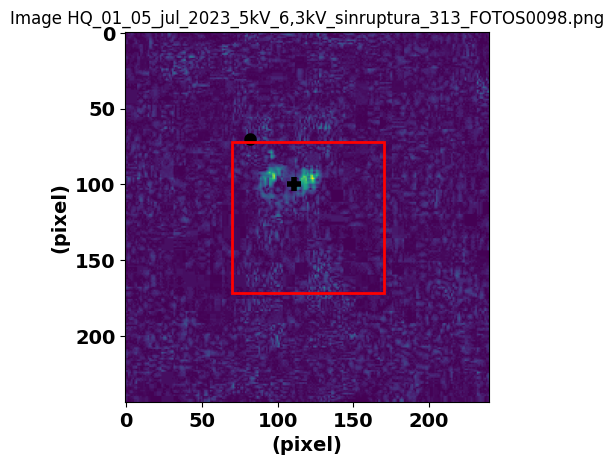

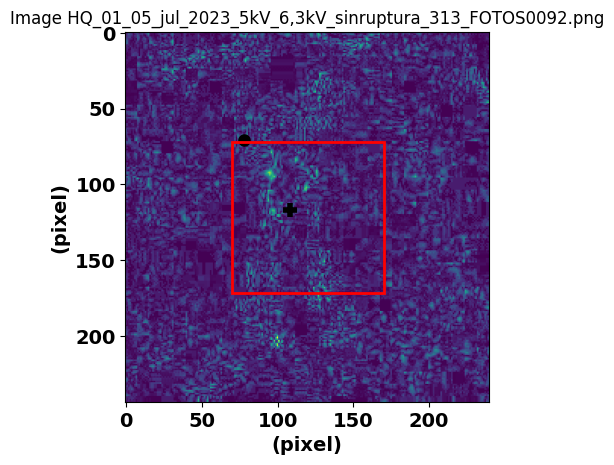

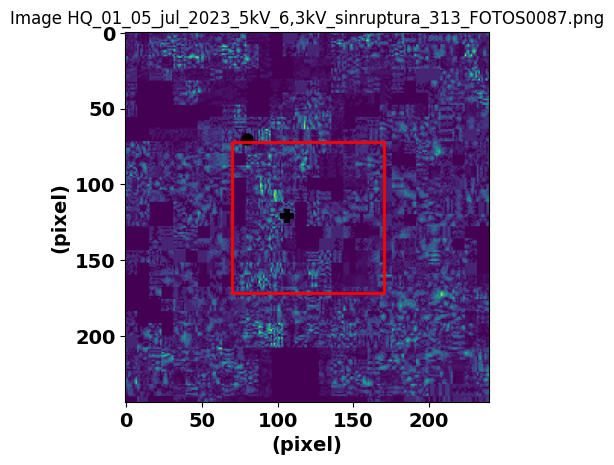

Los resultados se han guardado en /content/feature_NO_DP.txt


In [6]:
import os
import random
import matplotlib.pyplot as plt
from skimage import measure, io, color
import numpy as np

# Image directory

image_directory = '/IMAGES/NO_PD/'
classs = '1'

# List of image files in the directory
image_files = [f for f in os.listdir(image_directory) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Select the first image as the base image
base_image_path = os.path.join(image_directory, image_files[0])
base_image = io.imread(base_image_path)

# Remove transparency channel (RGBA to RGB) 
base_image_rgb = base_image[:,:,:3]

    # Convert image to grayscale 
base_image_gray = color.rgb2gray(base_image_rgb)

# Root directory to save the feature_NO_DP.csv file

output_dir = '/FEATURE_RESULTS/'

# Full file pathfeature_ruptura.csv
output_file_path = os.path.join(output_dir, 'feature_NO_DP.csv')

# Write headers to file feature_DP.csv
with open(output_file_path, 'w') as output_file:
    output_file.write("area_pixels, centroid_x, centroid_y, centroid_x_roi, centroid_y_roi, mean_coords_x, mean_coords_y, lado_px, image_width, image_height, mean_intensity, std_intensity, threshold, class\n")
modo=0

# Iterate over the remaining images and subtract them from the base image
for image_file in image_files[1:]:
    # Full path of the current image
    current_image_path = os.path.join(image_directory, image_file)
    # Load current image 
    current_image = io.imread(current_image_path)
    # Delete the transparency channel (RGBA a RGB)
    current_image_rgb = current_image[:,:,:3]

    # Convert image to grayscale
    current_image_gray = color.rgb2gray(current_image_rgb)

    # Subtract the current image from the base image
    current_image_gray = np.abs(base_image_gray - current_image_gray)

    

    # Dimensions of the square centered in the image in pixels
    lado_px = 100

    # Calculate the coordinates of the centered square
    centro_x = current_image_rgb.shape[1] // 2
    centro_y = current_image_rgb.shape[0] // 2
    start_x = centro_x - lado_px // 2
    end_x = centro_x + lado_px // 2
    start_y = centro_y - lado_px // 2
    end_y = centro_y + lado_px // 2

    # Select the region of interest (ROI)
    roi = current_image_gray[start_y:end_y, start_x:end_x]

    # Calculate the mean and standard deviation of the pixels in the ROI
    mean_intensity = roi.mean()
    std_intensity = roi.std()

    # Threshold as the mean plus two times the standard deviation
    threshold = mean_intensity + 2 * std_intensity

    # Select pixels in the ROI that exceed the threshold
    above_threshold_mask = roi >= threshold

    # Get the coordinates (indexes) of the pixels that exceed the threshold 
    coords_x, coords_y = np.nonzero(above_threshold_mask)

    # Calculate the average of the x and y coordinates
    mean_coords_x = np.mean(coords_x)
    mean_coords_y = np.mean(coords_y)

    # Highlight pixels that exceed the threshold in the original image
    image_highlighted = current_image_rgb.copy()
    image_highlighted[start_y:end_y, start_x:end_x][above_threshold_mask] = [255, 0, 0]  # Resaltar en rojo

    # Calculate the area and centroid of the highlighted region
    labels = measure.label(above_threshold_mask)
    props = measure.regionprops(labels)

    # Get the area in pixels and the centroid
    area_pixels = props[0].area
    centroid_x, centroid_y = props[0].centroid

    # Adjust the centroid coordinates relative to the ROI
    mean_x_roi = mean_coords_x + start_x
    mean_y_roi = mean_coords_y + start_y

    centroid_x_roi = centroid_x + start_x
    centroid_y_roi = centroid_y + start_y
    modo=modo+1
    if modo < 20:

    #

     # View the modified image
      plt.figure()
      #plt.imshow(image_highlighted)
      plt.imshow(current_image_gray)
      plt.scatter(centroid_y_roi, centroid_x_roi, marker='.', color='black', s=100,linewidth=4)
      #plt.scatter(mean_coords_y + start_x, mean_coords_x + start_y, marker='x', color='black', s=100,linewidth=4)
      plt.scatter(mean_coords_y+start_y , mean_coords_x+start_x , marker='+', color='black', s=100,linewidth=4)
      plt.gca().add_patch(plt.Rectangle((start_x, start_y), lado_px, lado_px, linewidth=2, edgecolor='r', facecolor='none'))
      plt.title(f'Image {image_file}')  # Título con el nombre de la imagen actual
     # Agregar 'pixel' en los ejes
      plt.xlabel('(pixel)', fontsize=14, fontweight='bold')
      plt.ylabel('(pixel)', fontsize=14, fontweight='bold')
      # Aumentar tamaño de los números de los ejes y hacerlos en negrita
      plt.xticks(fontsize=14, fontweight='bold')
      plt.yticks(fontsize=14, fontweight='bold')
      plt.show()






# Write results to feature_NO_DP.csv file
    with open(output_file_path, 'a') as output_file:
        formatted_results = (
            f"{area_pixels:.3f}, {centroid_x:.3f}, {centroid_y:.3f}, "
            f"{centroid_x_roi:.3f}, {centroid_y_roi:.3f}, {mean_coords_x:.3f}, {mean_coords_y:.3f}, "
            f"{lado_px}, {current_image_gray.shape[1]}, {current_image_gray.shape[0]},{mean_intensity:.3f},{std_intensity:.3f},{threshold:.3f},{classs}\n"
        )

        output_file.write(formatted_results)

print(f"The results have been saved in {output_file_path}")


In [21]:
import pandas as pd

def merge_csv_files(file_paths, output_path):
    # List to store the DataFrames of each file
    dfs = []

    # Read each CSV file and add it to the DataFrame
    for file_path in file_paths:
        df = pd.read_csv(file_path)
        dfs.append(df)

    # Concatenate the DataFrames along the rows
    result_df = pd.concat(dfs, ignore_index=True)

    # Write the resulting DataFrame to a new CSV file
    result_df.to_csv(output_path, index=False)
    print(f'Files merged and saved in: {output_path}')

# List of paths of CSV files to merge
#file_paths_to_merge = ["/FEATURE_RESULTS/feature_DP.csv", "/FEATURE_RESULTS/feature_NO_DP.csv"]

file_paths_to_merge = ["/FEATURE_RESULTS/feature_ruptura.csv","/FEATURE_RESULTS/feature_NO_DP.csv" ]
# Path to save the resulting file
output_file_path = "/FEATURE_RESULTS/FEATURE_resultante_ruptura_NODP.csv"

# Call the function to merge the files
merge_csv_files(file_paths_to_merge, output_file_path)

Files merged and saved in: /content/FEATURE_resultante_ruptura_NODP.csv
